In [ ]:
import numpy as np
from PIL import Image,ImageFilter,ImageEnhance
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import cv2
import math
%matplotlib inline

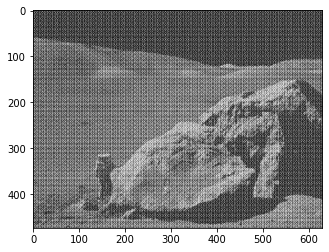

In [ ]:
img = Image.open('A1.tif')
imshow(img,cmap='gray')

In [ ]:
img_array = np.array(img)

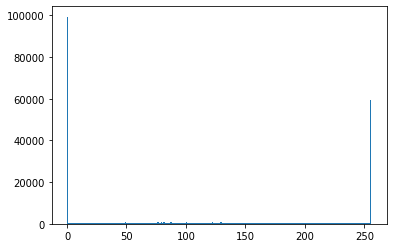

In [ ]:
flattened_data = img_array.ravel() 
plt.hist(flattened_data,256,[0,256])  
plt.show()  

In [ ]:
def averaging(img_param):
  img_temp = np.zeros((img_param.shape[0],img_param.shape[1]))
  for x in range(img_param.shape[0]-1):
    for y in range(img_param.shape[1]-1):
      if x==0 and y==0:
        temp = (img_param[x+1][y+1])
        img_temp[x][y]=temp
      if x == img_param.shape[0]-1 and y==0:
        temp = (img_param[x-1][y+1])
        img_temp[x][y]=temp
      if x == 0 and y==img_param.shape[1]-1:
        temp = (img_param[x+1][y-1])
        img_temp[x][y]=temp
      if x == img_param.shape[0]-1 and y==img_param.shape[1]-1:
        temp = (img_param[x-1][y-1])
        img_temp[x][y]=temp
      elif x!=0 and y!=0 and x!=img_param.shape[0]-1 and y!=img_param.shape[1]-1:
        temp = np.mean([img_param[x-1][y-1], img_param[x+1][y+1], img_param[x-1][y+1], img_param[x+1][y-1],img_param[x-1][y],img_param[x+1][y],img_param[x][y-1],img_param[x][y+1] ])
        img_temp[x][y]=temp
  return img_temp

In [ ]:
avg_img = averaging(img_array)

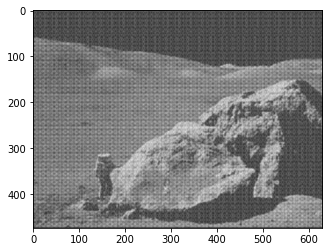

In [ ]:
avg_img = avg_img.astype(np.uint8)
img_imp = Image.fromarray(avg_img)
imshow(img_imp,cmap='gray')

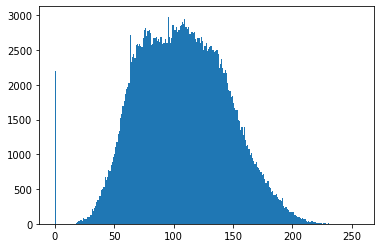

In [ ]:
flattened_data = avg_img.ravel() 
plt.hist(flattened_data,256,[0,256])  
plt.show()

In [ ]:
def contrast_stretching(img_param,rmin,rmax):
  img_contrast_streched = np.array(img)
  for x in range(img_param.shape[0]-1):
    for y in range(img_param.shape[1]-1):
      temp = (img_param[x][y] - rmin)*((255-1)/(rmax-rmin))
      img_contrast_streched[x][y]=temp
  return img_contrast_streched

In [ ]:
img_contrast_streched = contrast_stretching(avg_img,18,225)

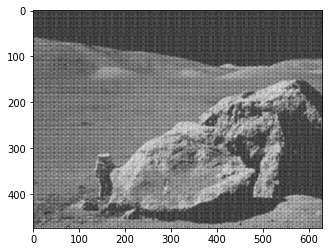

In [ ]:
img_contrast_streched = img_contrast_streched.astype(np.uint8)
img_imp = Image.fromarray(img_contrast_streched)
imshow(img_imp,cmap='gray')

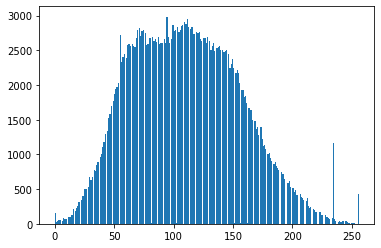

In [ ]:
flattened_data = img_contrast_streched.ravel() 
plt.hist(flattened_data,256,[0,256])  
plt.show()

In [ ]:
avg_img2 = averaging(img_contrast_streched)

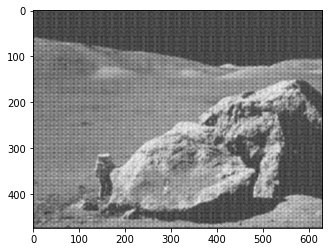

In [ ]:
avg_img2 = avg_img2.astype(np.uint8)
img_imp = Image.fromarray(avg_img2)
imshow(img_imp,cmap='gray')

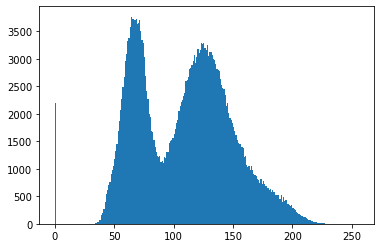

In [ ]:
flattened_data = avg_img2.ravel() 
plt.hist(flattened_data,256,[0,256])  
plt.show()

In [ ]:
img_contrast_streched = contrast_stretching(avg_img2,30,225)

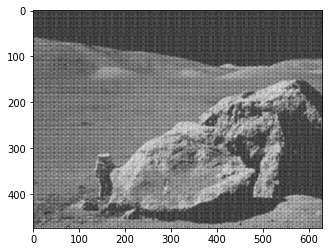

In [ ]:
img_contrast_streched = img_contrast_streched.astype(np.uint8)
img_imp = Image.fromarray(img_contrast_streched)
imshow(img_imp,cmap='gray')

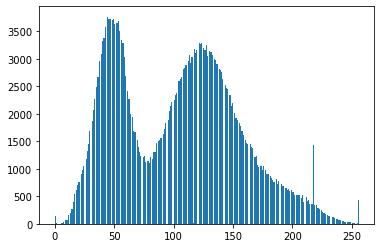

In [ ]:
flattened_data = img_contrast_streched.ravel() 
plt.hist(flattened_data,256,[0,256])  
plt.show()

In [ ]:
avg_img3 = averaging(img_contrast_streched)

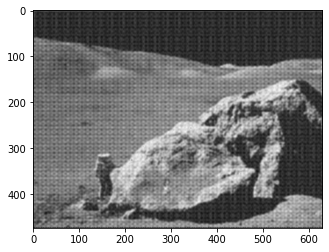

In [ ]:
avg_img3 = avg_img3.astype(np.uint8)
img_imp = Image.fromarray(avg_img3)
imshow(img_imp,cmap='gray')

In [ ]:
img_imp.save("denoised.jpg")